In [1]:
# Import necessary libraries and suppress warnings

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [3]:
# Load the dataset

In [4]:
df = pd.read_parquet("../dataset/processed_data.parquet")
df.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Vehicle Location
0,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),True,30.0,0.0,35.0,POINT (-122.8728334 47.5798304)
1,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),True,215.0,0.0,23.0,POINT (-122.6368884 47.7469547)
2,Snohomish,Bothell,WA,98012.0,2016,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),False,15.0,0.0,1.0,POINT (-122.206146 47.839957)
3,Kitsap,Bremerton,WA,98310.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),True,215.0,0.0,23.0,POINT (-122.6231895 47.5930874)
4,King,Redmond,WA,98052.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),True,150.0,0.0,45.0,POINT (-122.13158 47.67858)


In [8]:
# Separate df for EDA
df_car = df[
    [
        "Make",
        "Model",
        "Model Year",
        "Base MSRP",
        "Electric Range",
        "Electric Vehicle Type",
        "Clean Alternative Fuel Vehicle (CAFV) Eligibility",
    ]
]
df_car = df_car.drop_duplicates()
df_car.reset_index(inplace=True, drop=True)
df_car.head()

,Make,Model,Model Year,Base MSRP,Electric Range,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility
0,BMW,X5,2021,0.0,30.0,Plug-in Hybrid Electric Vehicle (PHEV),True
1,TESLA,MODEL 3,2018,0.0,215.0,Battery Electric Vehicle (BEV),True
2,PORSCHE,PANAMERA,2016,0.0,15.0,Plug-in Hybrid Electric Vehicle (PHEV),False
3,NISSAN,LEAF,2019,0.0,150.0,Battery Electric Vehicle (BEV),True
4,FORD,FUSION,2015,0.0,19.0,Plug-in Hybrid Electric Vehicle (PHEV),False


##20 of the most sold EVs

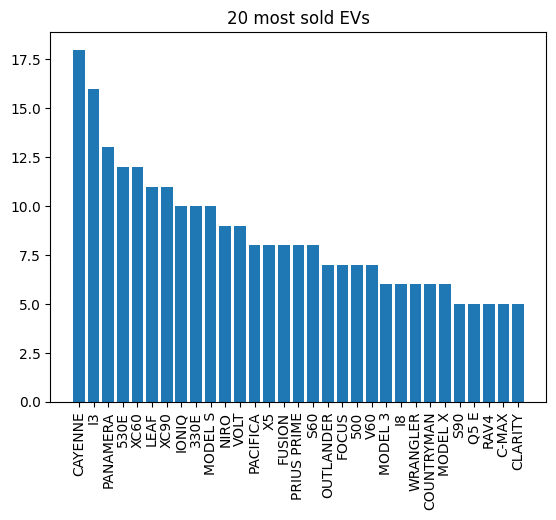

In [9]:
sales_count = df_car.groupby("Model").size().reset_index(name="Sales")
sales_count = sales_count.sort_values("Sales", ascending=False)
plt.bar(sales_count.loc[:20, "Model"], sales_count.loc[:20, "Sales"])
plt.xticks(rotation=90)
plt.title("20 most sold EVs")
plt.show()

##Year-wise sales

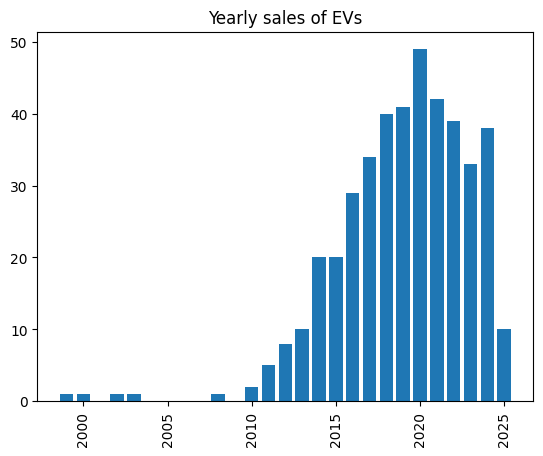

In [10]:
yearly_sales = df_car.groupby("Model Year").size().reset_index(name="Sales")
plt.bar(yearly_sales["Model Year"], yearly_sales["Sales"])
plt.xticks(rotation=90)
plt.title("Yearly sales of EVs")
plt.show()

Increasing trend in the EV adoption over the years. 2023 shows a significant growth in EV sales

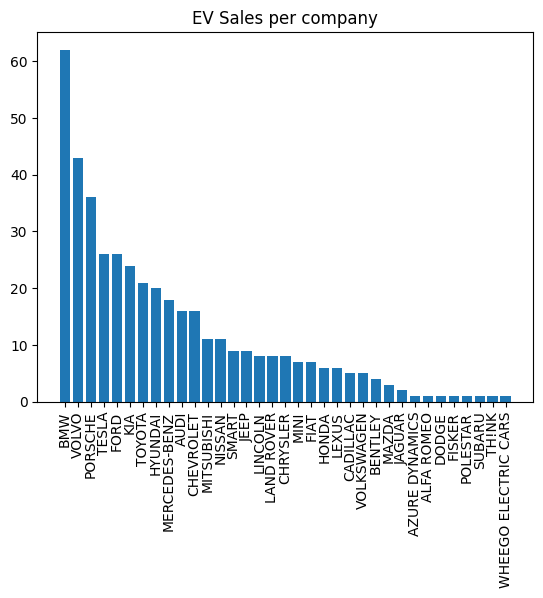

In [12]:
make_count = df_car.groupby("Make").size().reset_index(name="Sales")
make_count = make_count.sort_values("Sales", ascending=False)
plt.bar(make_count["Make"], make_count["Sales"])
plt.xticks(rotation=90)
plt.title("EV Sales per company")
plt.show()

We can see that there is unequal distribution as one company, TESLA, dominates the sales

##Univariate analysis

In [13]:
df_car.head()

,Make,Model,Model Year,Base MSRP,Electric Range,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility
0,BMW,X5,2021,0.0,30.0,Plug-in Hybrid Electric Vehicle (PHEV),True
1,TESLA,MODEL 3,2018,0.0,215.0,Battery Electric Vehicle (BEV),True
2,PORSCHE,PANAMERA,2016,0.0,15.0,Plug-in Hybrid Electric Vehicle (PHEV),False
3,NISSAN,LEAF,2019,0.0,150.0,Battery Electric Vehicle (BEV),True
4,FORD,FUSION,2015,0.0,19.0,Plug-in Hybrid Electric Vehicle (PHEV),False


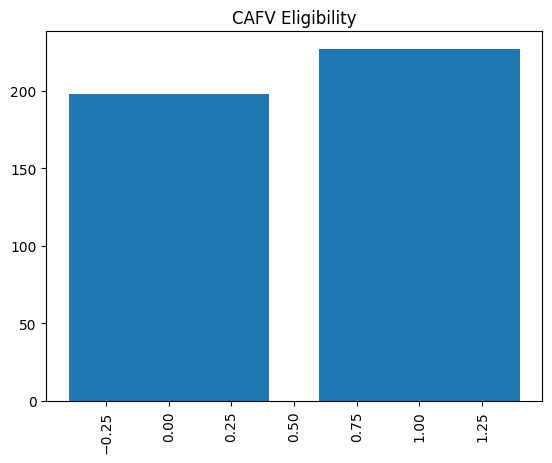

In [ ]:
cafve_count = df_car.groupby("Clean Alternative Fuel Vehicle (CAFV) Eligibility").size().reset_index(name="Sales")
plt.bar(cafve_count["Clean Alternative Fuel Vehicle (CAFV) Eligibility"], cafve_count["Sales"])
plt.xticks(rotation=90)
plt.title("CAFV Eligibility")
plt.show()

Most of the EVs in the market do not have CAFV eligibility

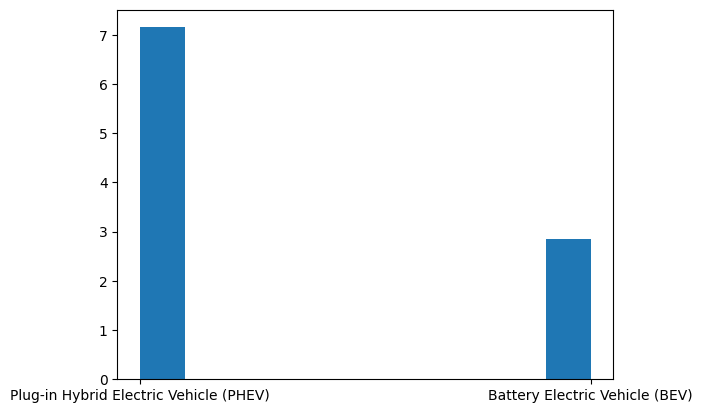

In [16]:
plt.hist(df_car["Electric Vehicle Type"], rwidth=1, density=True)
plt.show()

Both BEV and PHEV types are equally available/common.

Numerical variable

In [17]:
def plot_statistics(data):
    mini = data.min()
    maxi = data.max()
    ran = data.max() - data.min()
    mean = data.mean()
    median = data.median()
    st_dev = data.std()
    skew = data.skew()
    kurt = data.kurtosis()
    points = mean - st_dev, mean + st_dev
    # Plotting the variable with every information
    sns.kdeplot(data, fill=True)
    # sns.lineplot(points, color = 'black', label = "std_dev")
    # sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    plt.plot(points, [0, 0], color="black", label="std_dev")
    plt.scatter([mini, maxi], [0, 0], color="orange", label="min/max")
    plt.scatter([mean], [0], color="red", label="mean")
    plt.scatter([median], [0], color="blue", label="median")
    # plt.ylim(bottom = -0.0005)
    # plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel("density")
    plt.title(
        "std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}".format(
            (round(points[0], 2), round(points[1], 2)),
            round(kurt, 2),
            round(skew, 2),
            (round(mini, 2), round(maxi, 2), round(ran, 2)),
            round(mean, 2),
            round(median, 2),
        )
    )
    plt.legend()

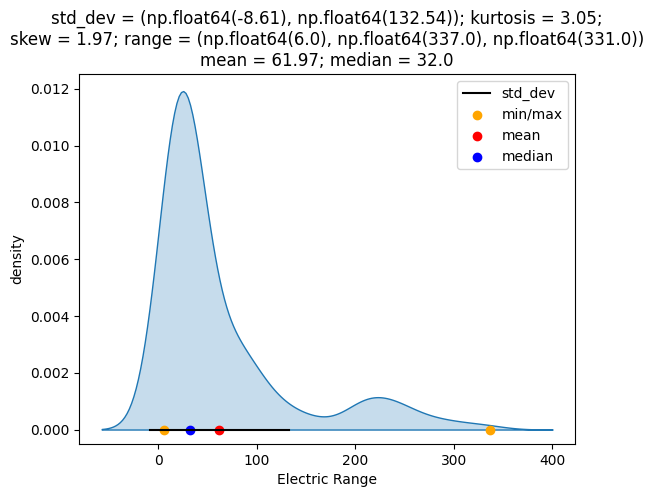

In [18]:
# Distribution of Electric Range
plot_statistics(df_car["Electric Range"])
plt.ylim(bottom=-0.0005)
plt.show()

Average electric range = 125.71  
Most of the EVs have electric range between 0 to 250  


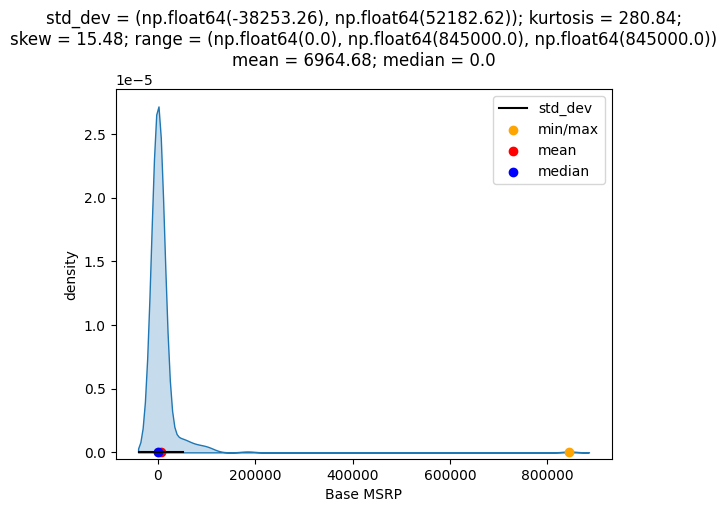

In [19]:
# Distribution of Price
plot_statistics(df_car["Base MSRP"])
plt.ylim(bottom=-0.0000005)
plt.show()

Average price of EVs is \$55000  
Price of EVs mostly range between \$7,000 to \$100,000  
Kurtosis of 145 indicates high probability of outliers in the data

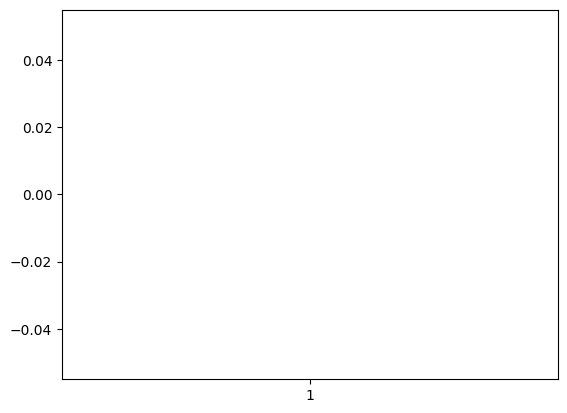

In [20]:
plt.boxplot(df_car["Base MSRP"])
plt.show()

Consider values above \$200,000 as outliers and remove for analysis

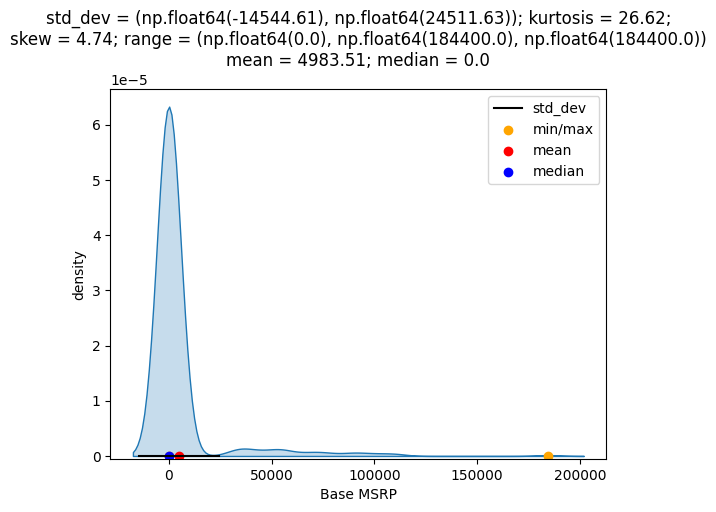

In [21]:
# cleaned_prices = df_car[df_car.price < 200000]
cleaned_prices = df_car[df_car["Base MSRP"] < 200000]
plot_statistics(cleaned_prices["Base MSRP"])
plt.ylim(bottom=-0.0000005)
plt.show()

EVs mostly range from \$20,000 to \$80,000 with average EV costing around \$50,000

##Bivariate Analysis

Range vs Price

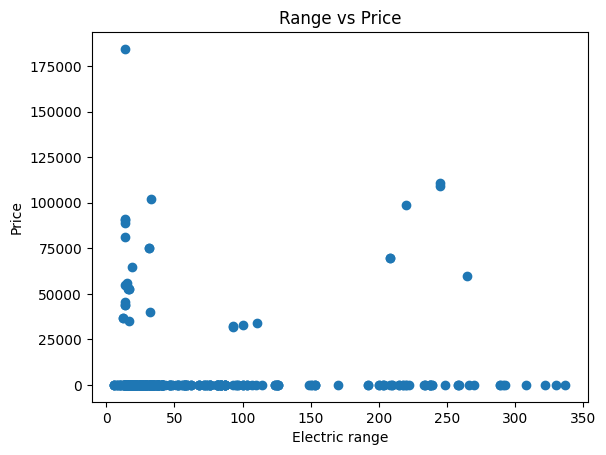

In [22]:
plt.scatter(cleaned_prices["Electric Range"], cleaned_prices["Base MSRP"])
plt.xlabel("Electric range")
plt.ylabel("Price")
plt.title("Range vs Price")
plt.show()

There does seem to be a strong relation between range and price.  
Higher price does not guarantee more range.  
Infact, mid-priced EVs have the most range

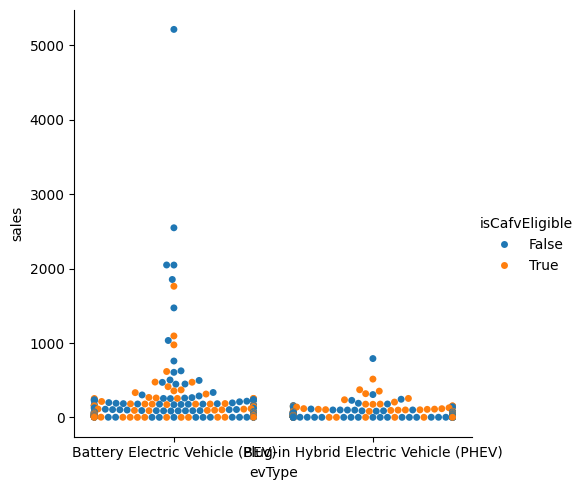

In [28]:
sns.catplot(data=df_car, x="evType", y="sales", hue="isCafvEligible", kind="swarm")
plt.show()

#Mulitvariate Analysis

##Pairplot

<Figure size 1000x600 with 0 Axes>

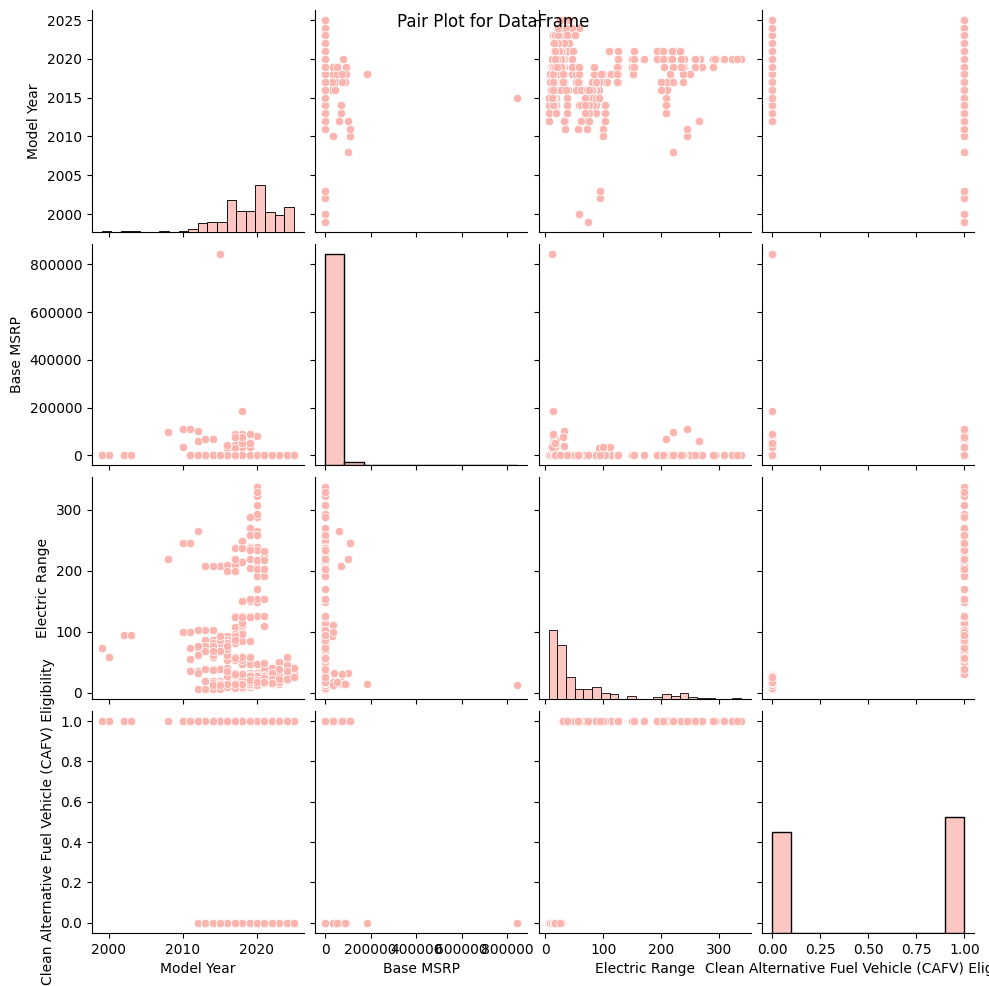

In [23]:
sns.set_palette("Pastel1")
plt.figure(figsize=(10, 6))
sns.pairplot(df_car)

plt.suptitle("Pair Plot for DataFrame")
plt.show()

##Heatmap

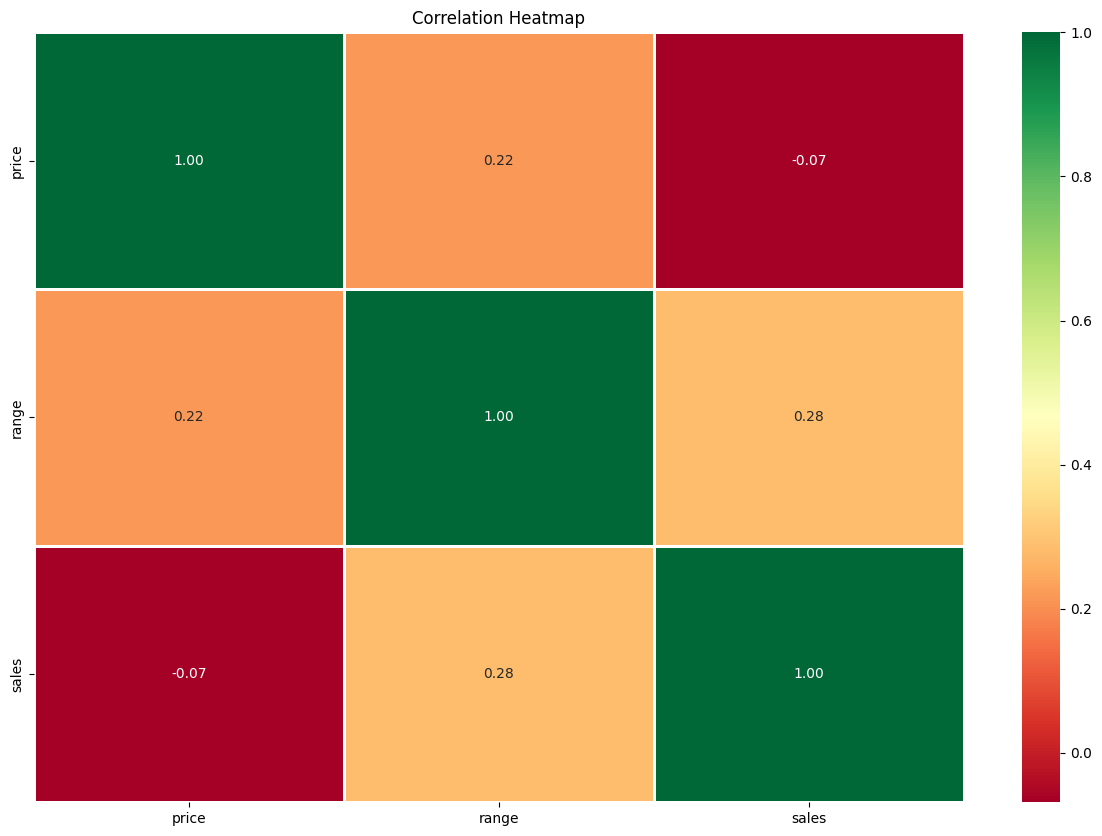

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    df_car[["price", "range", "sales"]].corr(),
    annot=True,
    fmt=".2f",
    cmap="RdYlGn",
    linewidths=2,
)
plt.title("Correlation Heatmap")
plt.show()

Low correlation between price, range and sales